# Week 6 - Datascience Analysis

Analysis of the European soccer matches and the odds provided by different agencies.

In [1]:
# Import Python Libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create to the Soccer Database connection.
cnx = sqlite3.connect('../data/european_soccer/database.sqlite')

# Retrive the Soccer Match & Team data from the DB
match_df = pd.read_sql_query("SELECT * FROM Match", cnx)
team_df = pd.read_sql_query("SELECT * FROM Team", cnx)
team_att_df = pd.read_sql_query("SELECT * FROM Team_Attributes", cnx)
player_att_df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

### Remove the soccer matches that don't have a complete set of odds across all betting agencies

In [3]:
# Columns that contain the betting odds
cols = match_df.columns[match_df.columns.slice_indexer('B365H','BSA')]

# Drop the matches that don't have a complete set of data
match_df = match_df.dropna(subset=cols)

### Calculate the returns a gambler would get starting with a 10k bankroll and betting \$1 dollar each match on a win/loss/draw with each of the agencies

In [5]:
# Setup bankroll for each betting agency with $10k
bankroll_dict = dict()
bankroll_list = []

for agency in cols:
    bankroll_dict[agency] = 10000

bankroll_list.append(bankroll_dict.copy())    

# Loop over the match results
for index, row in match_df.iterrows():
        
    # Place the $1 for the bet and update the match ID
    for key, value in bankroll_dict.items():
        bankroll_dict[key] = bankroll_dict[key] - 1
    
    # Determine the result - Home win, Draw, Home loss
    if row['home_team_goal'] > row['away_team_goal']:
        
        # Home team win so calulate the return for home bets
        for key, value in bankroll_dict.items():
            if key.endswith('H'):
                bankroll_dict[key] = bankroll_dict[key] + (1 * row[key])
        
    elif row['home_team_goal'] < row['away_team_goal']:
        
        # Away team win so calulate the return for away bets
        for key, value in bankroll_dict.items():
            if key.endswith('A'):
                bankroll_dict[key] = bankroll_dict[key] + (1 * row[key])
        
    else:
        # Draw so calulate the return for draw bets
        for key, value in bankroll_dict.items():
            if key.endswith('D'):
                bankroll_dict[key] = bankroll_dict[key] + (1 * row[key])
    
    bankroll_list.append(bankroll_dict.copy())
    
bankroll_df = pd.DataFrame(bankroll_list)


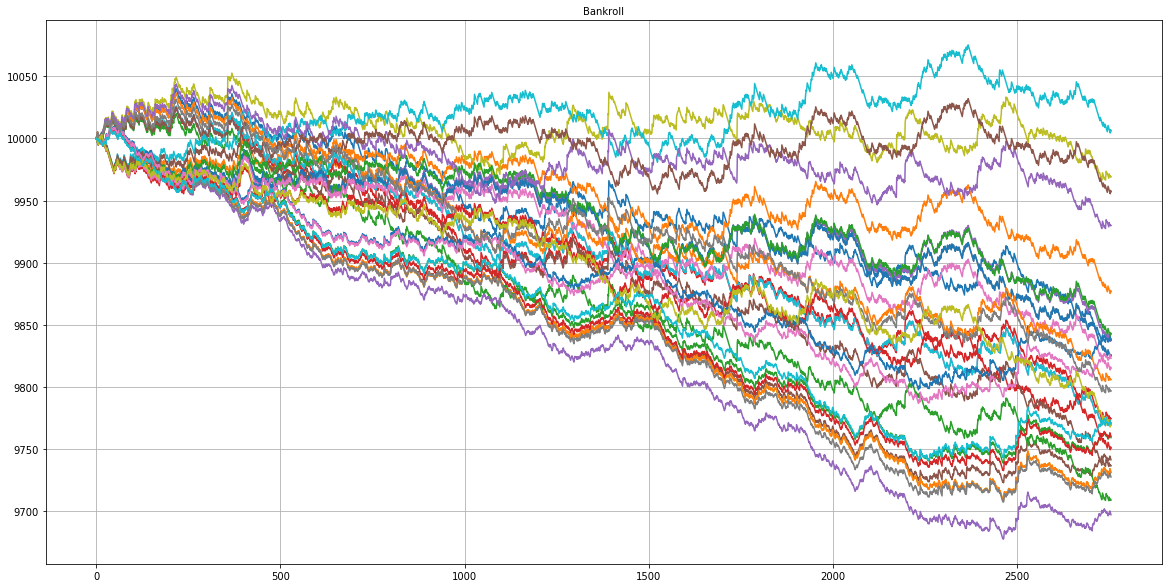

In [6]:
# Display the result in a line chart comparing the different betting agencies
fig, axis = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Bankroll',fontsize=10)

plt.plot(bankroll_df.index, bankroll_df.values)
plt.show()

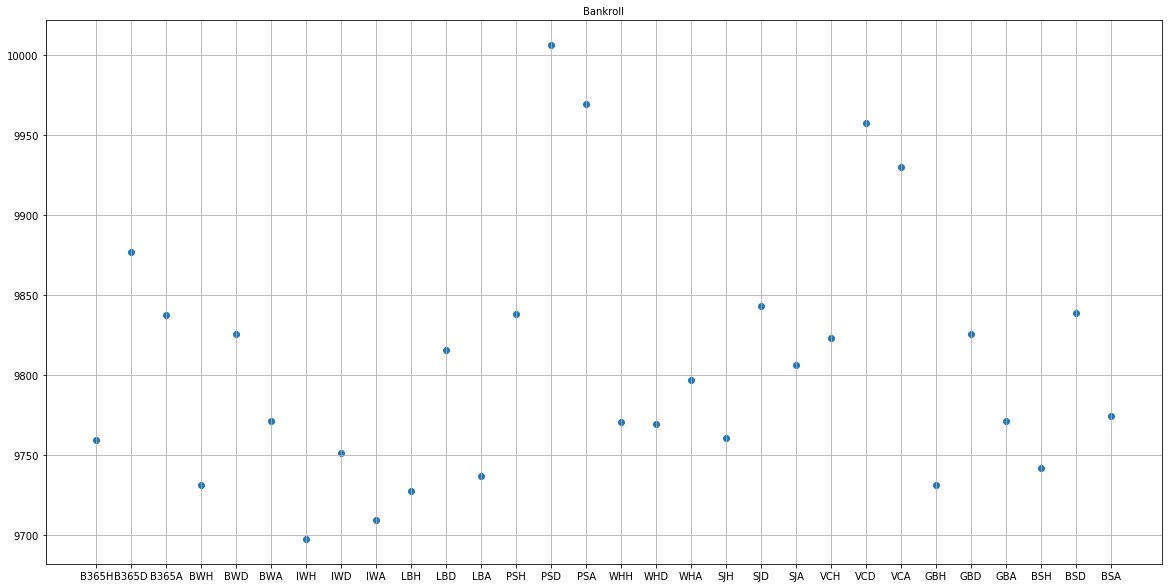

In [7]:
# Compare the ROI of betting with different agencies on the home team vs draw vs away team
fig, axis = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(20)
axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Bankroll',fontsize=10)

X = list(bankroll_dict.keys())
Y = list(bankroll_dict.values())

axis.scatter(X, Y)
plt.show()

### Is it more profitable to bet on the home team, draw or away team?

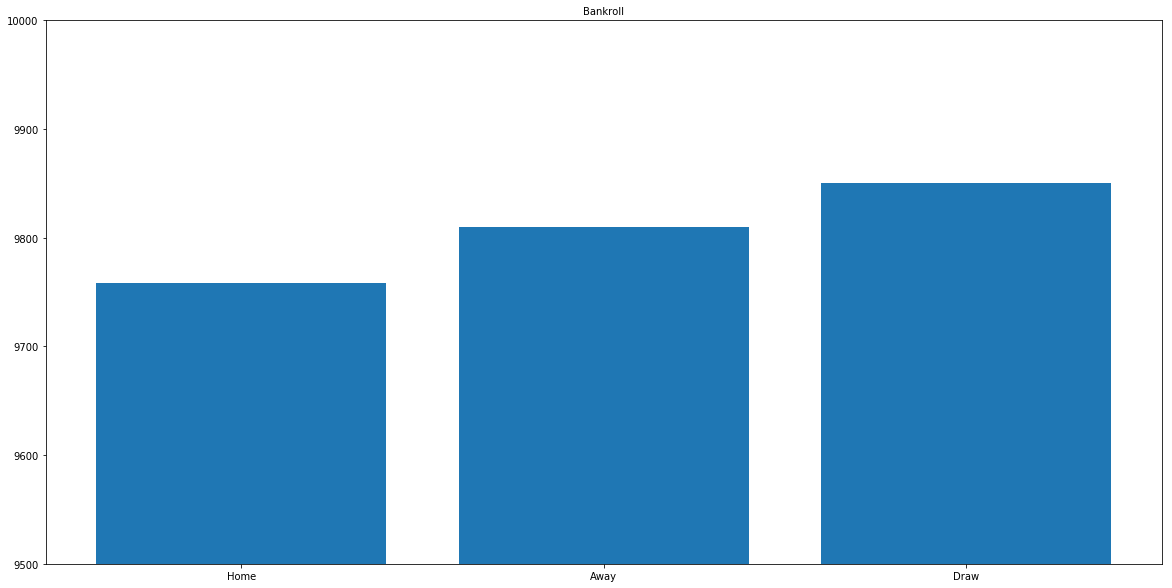

In [30]:
avg_bankroll = []
bet_type = ['Home', 'Away', 'Draw']

# Average bankroll after betting on home team
tmp = [ v for k,v in bankroll_dict.items() if k.endswith('H')]
avg_bankroll.append(sum(tmp) / len(tmp))

# Average bankroll after betting on away team
tmp = [ v for k,v in bankroll_dict.items() if k.endswith('A')]
avg_bankroll.append(sum(tmp) / len(tmp))

# Average bankroll after betting on a draw
tmp = [ v for k,v in bankroll_dict.items() if k.endswith('D')]
avg_bankroll.append(sum(tmp) / len(tmp))

fig, axis = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
axis.set_title('Bankroll',fontsize=10)

plt.ylim((9500, 10000))
plt.bar(bet_type, avg_bankroll)
plt.show()

### Random exploration of the corre

In [9]:
team_att_df.head(10)

id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
0   1               434         9930  2010-02-22 00:00:00                60   
1   2               434         9930  2014-09-19 00:00:00                52   
2   3               434         9930  2015-09-10 00:00:00                47   
3   4                77         8485  2010-02-22 00:00:00                70   
4   5                77         8485  2011-02-22 00:00:00                47   
5   6                77         8485  2012-02-22 00:00:00                58   
6   7                77         8485  2013-09-20 00:00:00                62   
7   8                77         8485  2014-09-19 00:00:00                58   
8   9                77         8485  2015-09-10 00:00:00                59   
9  10               614         8576  2010-02-22 00:00:00                60   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
1              Balanced                  48.0                    Normal   
2              Balanced                  41.0                    Normal   
3                  Fast                   NaN                    Little   
4              Balanced                   NaN                    Little   
5              Balanced                   NaN                    Little   
6              Balanced                   NaN                    Little   
7              Balanced                  64.0                    Normal   
8              Balanced                  64.0                    Normal   
9              Balanced                   NaN                    Little   

   buildUpPlayPassing buildUpPlayPassingClass           ...             \
0                  50                   Mixed           ...              
1                  56                   Mixed           ...              
2                  54                   Mixed           ...              
3                  70                    Long           ...              
4                  52                   Mixed           ...              
5                  62                   Mixed           ...              
6                  45                   Mixed           ...              
7                  62                   Mixed           ...              
8                  53                   Mixed           ...              
9                  40                   Mixed           ...              

  chanceCreationShooting  chanceCreationShootingClass  \
0                     55                       Normal   
1                     64                       Normal   
2                     64                       Normal   
3                     70                         Lots   
4                     52                       Normal   
5                     55                       Normal   
6                     55                       Normal   
7                     57                       Normal   
8                     63                       Normal   
9                     55                       Normal   

  chanceCreationPositioningClass  defencePressure defencePressureClass  \
0                      Organised               50               Medium   
1                      Organised               47               Medium   
2                      Organised               47               Medium   
3                      Organised               60               Medium   
4                      Organised               47               Medium   
5                      Organised               40               Medium   
6                      Organised               42               Medium   
7                      Organised               41               Medium   
8                      Free Form               49               Medium   
9                      Organised               30                 Deep   

   defenceAggression defenceAggressionClass defen

In [10]:
np.corrcoef(team_att_df['defenceAggression'],team_att_df['defencePressure'])

array([[1.       , 0.4224932],
       [0.4224932, 1.       ]])

In [11]:
player_att_df['overall_rating'].head(10)

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
5    74.0
6    74.0
7    73.0
8    73.0
9    73.0
Name: overall_rating, dtype: float64

In [12]:
player_att_df.corr()

id  player_fifa_api_id  player_api_id  \
id                  1.000000            0.003368       0.001987   
player_fifa_api_id  0.003368            1.000000       0.554620   
player_api_id       0.001987            0.554620       1.000000   
overall_rating     -0.002875           -0.274089      -0.322389   
potential           0.001217           -0.027619       0.010991   
crossing           -0.019149           -0.064183      -0.110620   
finishing          -0.007882           -0.028010      -0.060387   
heading_accuracy   -0.011295           -0.104655      -0.129488   
short_passing      -0.006132           -0.064219      -0.087320   
volleys            -0.006343           -0.087743      -0.130140   
dribbling          -0.013890            0.049822       0.018328   
curve              -0.019309           -0.051394      -0.097913   
free_kick_accuracy -0.007608           -0.108611      -0.150856   
long_passing       -0.007382           -0.112457      -0.138361   
ball_control       -0.012919           -0.023496      -0.051248   
acceleration       -0.007633            0.176840       0.103051   
sprint_speed       -0.011118            0.176643       0.095866   
agility            -0.000874            0.117608       0.027631   
reactions          -0.004240           -0.226008      -0.306165   
balance            -0.009445            0.007664       0.021107   
shot_power         -0.009725           -0.077579      -0.123198   
jumping            -0.004160           -0.072638      -0.141016   
stamina            -0.009816            0.012026      -0.108820   
strength           -0.008251           -0.177467      -0.232937   
long_shots         -0.010012           -0.067155      -0.117087   
aggression         -0.016650           -0.170696      -0.210959   
interceptions      -0.007730           -0.178182      -0.188561   
positioning        -0.014541           -0.086235      -0.107012   
vision             -0.007731           -0.164171      -0.188077   
penalties          -0.010620           -0.182479      -0.164783   
marking            -0.009555           -0.077979      -0.089998   
standing_tackle    -0.012196           -0.073212      -0.086596   
sliding_tackle     -0.010689           -0.054321      -0.072889   
gk_diving           0.013980           -0.091737      -0.071495   
gk_handling         0.010436           -0.143113      -0.128573   
gk_kicking          0.008645           -0.267489      -0.238898   
gk_positioning      0.013563           -0.145119      -0.128707   
gk_reflexes         0.014152           -0.135443      -0.124961   

                    overall_rating  potential  crossing  finishing  \
id                       -0.002875   0.001217 -0.019149  -0.007882   
player_fifa_api_id       -0.274089  -0.027619 -0.064183  -0.028010   
player_api_id            -0.322389   0.010991 -0.110620  -0.060387   
overall_rating            1.000000   0.766757  0.357699   0.329298   
potential                 0.766757   1.000000  0.277755   0.286684   
crossing                  0.357699   0.277755  1.000000   0.576860   
finishing                 0.329298   0.286684  0.576860   1.000000   
heading_accuracy          0.314099   0.207706  0.369747   0.373536   
short_passing             0.458361   0.382605  0.790150   0.579365   
volleys                   0.361470   0.301302  0.637891   0.851339   
dribbling                 0.354324   0.338675  0.809061   0.784659   
curve                     0.357772   0.296073  0.789132   0.691201   
free_kick_accuracy        0.349592   0.263358  0.707576   0.632248   
long_passing              0.435018   0.343716  0.681959   0.337601   
ball_control              0.444257   0.401368  0.807302   0.719709   
acceleration              0.245655   0.338044  0.599012   0.528942   
sprint_speed              0.254841   0.340054  0.579409   0.509506   
agility                   0.239896   0.292950  0.599248   0.554235   
reactions                 0.769246   0.580235  0.384514   0.354473   
balance     